## Import dataset from Kaggle.

In [1]:
# Upload kaggle.json file downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bytestreetboy","key":"13296d71e3a6e083b277c09dbf128a96"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Jul 23 10:22 kaggle.json


In [0]:
# Install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects API token file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [5]:
# Let's make sure the kaggle.json file is moved.
!ls -lha ~/.kaggle/

total 16K
drwxr-xr-x 2 root root 4.0K Jul 23 10:23 .
drwx------ 1 root root 4.0K Jul 23 10:23 ..
-rw-r--r-- 1 root root   69 Jul 23 10:22 kaggle.json


In [6]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!ls -lha ~/.kaggle/

total 16K
drwxr-xr-x 2 root root 4.0K Jul 23 10:23 .
drwx------ 1 root root 4.0K Jul 23 10:23 ..
-rw------- 1 root root   69 Jul 23 10:22 kaggle.json


In [7]:
# List available datasets.
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
new-york-state/nys-environmental-remediation-sites          NYS Environmental Remediation Sites                   3MB  2019-07-23 08:22:57            541  
new-york-city/new-york-city-current-job-postings            New York City Current Job Postings                    3MB  2019-07-21 22:04:51           3835  
AnalyzeBoston/crimes-in-boston                              Crimes in Boston                                     10MB  2018-09-04 17:56:03           3403  
jealousleopard/goodreadsbooks                               Goodreads-books                                     632KB  2019-06-14 16:35:05           4266  
sudalairajkumar/chennai-water-management                    Chen

In [8]:
# Copy the plant-seedlings dataset locally.
!kaggle competitions download -c plant-seedlings-classification

  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 4.53MB/s]
 85% 73.0M/86.0M [00:01<00:00, 27.7MB/s]
100% 86.0M/86.0M [00:02<00:00, 44.6MB/s]
100% 1.59G/1.60G [00:26<00:00, 72.5MB/s]
100% 1.60G/1.60G [00:26<00:00, 66.0MB/s]


In [10]:
# Let's make sure the plant-seedlings dataset is downloaded
!ls -lha .

total 1.7G
drwxr-xr-x 1 root root 4.0K Jul 23 10:24 .
drwxr-xr-x 1 root root 4.0K Jul 23 10:18 ..
drwxr-xr-x 1 root root 4.0K Jul 19 16:14 .config
drwxr-xr-x 1 root root 4.0K Jul 19 16:14 sample_data
-rw-r--r-- 1 root root 5.2K Jul 23 10:24 sample_submission.csv.zip
-rw-r--r-- 1 root root  86M Jul 23 10:24 test.zip
-rw-r--r-- 1 root root 1.7G Jul 23 10:24 train.zip


## Extract and Load dataset

In [11]:
!unzip sample_submission.csv.zip
!head sample_submission.csv

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
file,species
0021e90e4.png,Sugar beet
003d61042.png,Sugar beet
007b3da8b.png,Sugar beet
0086a6340.png,Sugar beet
00c47e980.png,Sugar beet
00d090cde.png,Sugar beet
00ef713a8.png,Sugar beet
01291174f.png,Sugar beet
026716f9b.png,Sugar beet


In [12]:
!unzip train.zip
!ls -lha train | head

Archive:  train.zip
   creating: train/
   creating: train/Fat Hen/
  inflating: train/Fat Hen/5bdfa3a44.png  
  inflating: train/Fat Hen/a86b9c0cd.png  
  inflating: train/Fat Hen/f3f6559bf.png  
  inflating: train/Fat Hen/946b48f62.png  
  inflating: train/Fat Hen/4d7fd4020.png  
  inflating: train/Fat Hen/2509e5bc5.png  
  inflating: train/Fat Hen/e2462573b.png  
  inflating: train/Fat Hen/7e98e4aa6.png  
  inflating: train/Fat Hen/075cb6666.png  
  inflating: train/Fat Hen/b43d0a350.png  
  inflating: train/Fat Hen/afac20b21.png  
  inflating: train/Fat Hen/4d2efbb45.png  
  inflating: train/Fat Hen/f0923dcd6.png  
  inflating: train/Fat Hen/180f41d53.png  
  inflating: train/Fat Hen/bfdeafadd.png  
  inflating: train/Fat Hen/ac6625b0f.png  
  inflating: train/Fat Hen/ba5c8f87f.png  
  inflating: train/Fat Hen/e7d278e0e.png  
  inflating: train/Fat Hen/efaab2370.png  
  inflating: train/Fat Hen/9d4722e74.png  
  inflating: train/Fat Hen/4e2f543a2.png  
  inflating: train/Fat Hen/53

In [13]:
!unzip test.zip
!ls -lha test | head

Archive:  test.zip
   creating: test/
  inflating: test/c0461776c.png      
  inflating: test/4bbfd1e05.png      
  inflating: test/1d0cbd819.png      
  inflating: test/93079d970.png      
  inflating: test/856f2910a.png      
  inflating: test/976e4e079.png      
  inflating: test/b31292706.png      
  inflating: test/29bab7cad.png      
  inflating: test/37297a64c.png      
  inflating: test/f2dc546ca.png      
  inflating: test/b6a3f7876.png      
  inflating: test/8874bba69.png      
  inflating: test/1459e96a0.png      
  inflating: test/9a3f20121.png      
  inflating: test/5315c2dca.png      
  inflating: test/b7a7f6390.png      
  inflating: test/20e562fd5.png      
  inflating: test/e3f50adfc.png      
  inflating: test/6ba4ef411.png      
  inflating: test/acdb75e00.png      
  inflating: test/e0ec5b6a1.png      
  inflating: test/219fd68d5.png      
  inflating: test/41f1c3cdb.png      
  inflating: test/8c98a6e9b.png      
  inflating: test/1bf9b94a6.png      
  inflating:

In [14]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
# As the train images have lables, these will be used for train-test split
data = ImageDataGenerator(validation_split=0.2, rescale=1/255)

In [16]:
train_generator = data.flow_from_directory(directory="train", 
                                           target_size=(256,256),
                                           class_mode="categorical", 
                                           shuffle=True, 
                                           batch_size=8, 
                                           subset='training'
                                          )

Found 3803 images belonging to 12 classes.


In [17]:
val_generator = data.flow_from_directory(directory="train", 
                                           target_size=(256,256),
                                           class_mode="categorical", 
                                           shuffle=True, 
                                           batch_size=8, 
                                           subset='validation'
                                        )

Found 947 images belonging to 12 classes.


## Generate Model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [19]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(12, activation='softmax'))

W0723 10:31:26.473077 140126749575040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 10:31:26.519026 140126749575040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 10:31:26.526019 140126749575040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 10:31:26.561139 140126749575040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0723 10:31:26.625270 140126749575040 deprecation_wrapp

In [20]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [21]:
cnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

W0723 10:31:39.864317 140126749575040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 10:31:39.902700 140126749575040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [22]:
%%time
cnn_output =  cnn.fit_generator(train_generator, epochs=20, steps_per_epoch=3800//8, validation_data=val_generator, validation_steps=950//8, verbose = 1)

W0723 10:31:51.660520 140126749575040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
475/475 [==============================] - 68s 143ms/step - loss: 2.4468 - acc: 0.1242 - val_loss: 2.4165 - val_acc: 0.1377
Epoch 2/20
475/475 [==============================] - 62s 130ms/step - loss: 2.4246 - acc: 0.1316 - val_loss: 2.4167 - val_acc: 0.1555
Epoch 3/20
475/475 [==============================] - 62s 130ms/step - loss: 2.4187 - acc: 0.1428 - val_loss: 2.4127 - val_acc: 0.2545
Epoch 4/20
475/475 [==============================] - 61s 129ms/step - loss: 2.3764 - acc: 0.1742 - val_loss: 2.0944 - val_acc: 0.3237
Epoch 5/20
475/475 [==============================] - 62s 129ms/step - loss: 1.8654 - acc: 0.3569 - val_loss: 1.6243 - val_acc: 0.4260
Epoch 6/20
475/475 [==============================] - 62s 130ms/step - loss: 1.6680 - acc: 0.4059 - val_loss: 1.5041 - val_acc: 0.4686
Epoch 7/20
475/475 [==============================] - 61s 129ms/step - loss: 1.5492 - acc: 0.4510 - val_loss: 1.3028 - val_acc: 0.5570
Epoch 8/20
475/475 [==============================] - 6

In [23]:
train_score = cnn.evaluate_generator(train_generator,steps=3800//8)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

Train loss: 0.5822372345113943
Train accuracy: 0.8102766798576033


In [24]:
val_score = cnn.evaluate_generator(val_generator,steps=950//8)
print('Validation loss:', val_score[0])
print('Validation accuracy:', val_score[1])

Validation loss: 0.768898393756475
Validation accuracy: 0.7635782747603834


## Generate predictions for the test files

In [25]:
# Get the class indices
classes = train_generator.class_indices
classes

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [26]:
# Invert keys and values in classes
inv_classes = {}
for key, value in classes.items():
  inv_classes[value] = key
inv_classes

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [0]:
import skimage.io as io
from skimage.transform import resize
import matplotlib.pyplot as plt

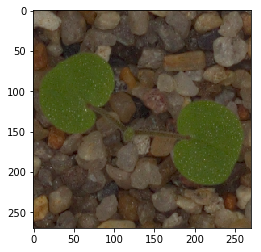

(270, 270, 3)

In [28]:
# As the test images don't have lables, these will be used for predictions
# Let us display one image from test images
img = io.imread('test/0021e90e4.png')
plt.imshow(img)
plt.show()

img.shape

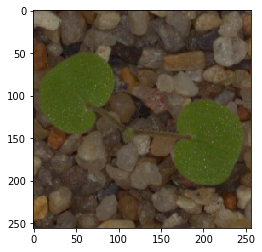

(256, 256, 3)

In [29]:
# Let us resize the image to input size of model
img = resize(img, (256,256,3), mode="symmetric")
plt.imshow(img)
plt.show()

img.shape

In [0]:
def GetImageClass(image):
  prediction = cnn.predict_classes(image.reshape(1,256,256,3))
  return inv_classes[prediction[0]]

In [31]:
GetImageClass(img)

'Small-flowered Cranesbill'

In [0]:
import os
import numpy as np
import pandas as pd

In [33]:
# Let's get the predicted labels/ classes for all the test images
test_image_class = pd.DataFrame(columns=['file','species'])
for root, dirs, files in os.walk('test'):
  for file in files:
    path = os.path.join(root,file)
    img = io.imread(path)
    # Resize the image to input size of model
    img = resize(img, (256,256,3), mode="symmetric")
    label = GetImageClass(img)
    test_image_class = test_image_class.append({'file':file,'species':label,},ignore_index=True)
test_image_class

,file,species
0,acdb75e00.png,Loose Silky-bent
1,6b721f68e.png,Loose Silky-bent
2,618de3d7a.png,Charlock
3,fd925f542.png,Common Chickweed
4,2a667e099.png,Fat Hen
5,4823c3ffa.png,Fat Hen
6,1d56351b2.png,Common Chickweed
7,f4e7733d4.png,Small-flowered Cranesbill
8,bb1d1bfd3.png,Cleavers
9,615d2b0a9.png,Sugar beet


In [0]:
# Let's save the file in csv format
test_image_class.to_csv('submission.csv', index=False)

In [35]:
# Let's check if the file is saved
!ls -lha .

total 1.7G
drwxr-xr-x  1 root root 4.0K Jul 23 12:06 .
drwxr-xr-x  1 root root 4.0K Jul 23 10:18 ..
drwxr-xr-x  1 root root 4.0K Jul 19 16:14 .config
drwxr-xr-x  1 root root 4.0K Jul 19 16:14 sample_data
-rw-rw-r--  1 root root  20K Nov 21  2017 sample_submission.csv
-rw-r--r--  1 root root 5.2K Jul 23 10:24 sample_submission.csv.zip
-rw-r--r--  1 root root  23K Jul 23 12:06 submission.csv
drwxrwxr-x  2 root root  36K Nov 21  2017 test
-rw-r--r--  1 root root  86M Jul 23 10:24 test.zip
drwxrwxr-x 14 root root 4.0K Nov 21  2017 train
-rw-r--r--  1 root root 1.7G Jul 23 10:24 train.zip


In [36]:
# Let's examine the file contents
!head submission.csv

file,species
acdb75e00.png,Loose Silky-bent
6b721f68e.png,Loose Silky-bent
618de3d7a.png,Charlock
fd925f542.png,Common Chickweed
2a667e099.png,Fat Hen
4823c3ffa.png,Fat Hen
1d56351b2.png,Common Chickweed
f4e7733d4.png,Small-flowered Cranesbill
bb1d1bfd3.png,Cleavers
